# 학습 목표

- 해당 장에서는 "신경망과 Q 러닝"에 대해 다루고 있으며, 주요 학습 목표는 다음과 같습니다:

1. **기본 개념 이해**: 상태와 행동의 가짓수가 적은 문제와 많은 문제의 차이점 이해하기.
2. **현실적 문제 인식**: 현실에서는 상태와 행동의 후보가 많아 Q 함수를 테이블로 관리하는 것이 비현실적임을 인식하기.
3. **딥러닝의 필요성**: 많은 상태와 행동 후보가 존재하는 문제에서 Q 함수를 테이블로 관리할 수 없기 때문에 딥러닝을 사용하는 이유 이해하기.
4. **딥러닝과 강화 학습의 결합**: 딥러닝을 통해 Q 함수를 근사하는 방법을 배우고, 이를 통해 강화 학습을 향상시키는 원리 이해하기.
5. **DeZero 사용법**: DeZero 프레임워크를 사용하여 딥러닝을 구현하는 방법을 학습하기.
6. **실습을 통한 구현**: DeZero를 이용하여 신경망의 기초를 배우고, 실제로 Q 러닝을 신경망으로 구현해보기.

이 학습 목표를 통해 독자는 Q 함수의 관리가 비현실적인 상황에서 딥러닝의 필요성과 이를 구현하는 방법에 대해 학습할 수 있습니다.

# DeZero 기초

- 딥러닝 프레임워크와, 기초적인 머신러닝 문제(선형 회귀) 그리고 신경만 구축을 순서

<img src='./images/fig_07_01.png' width=600>

- DeZero는 파이토치를 기반으로 '알기 쉽게' 설계된 프레임 워크

## DeZero 사용법

In [4]:
# !pip install dezero

In [7]:
import dezero
print(dezero.__file__)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/dezero/__init__.py


- Variable class
    - numpy의 nd_array의 wrapper class

In [8]:
import numpy as np
from dezero import Variable

x_np = np.array(5.0)
x = Variable(x_np)

y = 3*x**2
print(y)

variable(75.0)


- 미분하기
    - Variable 변수에 미분을 수행하는 backward() 메서드 사용 

In [9]:
y.backward()
print(x.grad)

variable(30.0)


- y는 Variable 인스턴스, backward() 메서드로 역전파(backpropagation) 수행
- 역전파를 수행하면 각 변수의 미분값을 체인룰을 기반으로 구할 수 있음 

## 다차원 배열(텐서)과 함수

- 다차원 배열은 여러개의 숫자(원소)를 한꺼번에 다루기 위한 데이터 구조
- 원소 배열에는 **방향**이 있으며, 그 방향을 **차원** 또는 **축** 이라고 한다.

<img src='./images/fig_07_02.png' width=600>

- 왼쪽 부터 0차원, 1차원 2차원 배열
- 각각, 스칼라, 벡터, 행렬
- 다차원 배열은 텐서(tensor) 라고도 함

### 벡터의 내적
- 벡터의 내적은, 두개의 벡터 $\mathbf{a} = (a_1, \dots, a_n)$ 과 $\mathbf{b} = (b_1, \dots, b_n)$ 가 있을 때
    - $\mathbf{a} \cdot \mathbf{b} = a_1b_1 + a_2b_2 + \dots + a_nb_n$
 - 두 벡터의 '대응하는 원소의 곱을 모두 더한 것'이 벡터의 내적

In [10]:
import numpy as np
from dezero import Variable
import dezero.functions as F

a = np.array([1,2,3])
b = np.array([4,5,6])
a, b = Variable(a), Variable(b)
c = F.matmul(a, b)
print(c)

variable(32)


### 행렬의 곱
<img src='./images/fig_07_03.png' width=600>

- 왼쪽 행렬의 '가로 벡터'와 오른쪽 행렬의 '세로 벡터' 사이의 내적
- 그 결과가 새로운 행렬의 해당 원소

In [11]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
a, b = Variable(a), Variable(b)
c = F.matmul(a, b)
print(c)

variable([[19 22]
          [43 50]])


<img src='./images/fig_07_04.png' width=600>
- 행렬이나 벡터를 이용한 계산에서는 형상(shape)에 주의

## 최적화

- 다음식의 최적화를 해보자
    - $y=100(x_1 - x^2_0)^2+(x_0 -1)^2$ 
- 이 함수를 로젠브록 함수 라고 함
    - 진정한 최솟값을 찾기가 어렵고
    - 함수의 형태가 특징적이기 때문에 최적화 벤치 마크 용도로 널리 쓰임
- 로젠브록 함수의 출력이 최소가 되는 $x_0$과 $x_1$ 찾기
    - 정답은 $(x_0, x_1) = (1, 1)$

> 함수가 최솟값(또는 최댓값)이 되게 하는 '인수(입력)'를 찾는 작업을 **최적화** 라고 한다.

In [12]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100*(x1-x0**2)**2 + (x0-1)**2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

variable(-2.0) variable(400.0)


- y.backward()를 호출 하면 $x_0$과 $x_1$의 미분 $\frac{\partial y}{\partial x_0}$와 $\quad \frac{\partial y}{\partial x_1}$가 -2와 400으로 계산
- (-2, 400)을 모아 만든 벡터를 기울기(gradient) 또는 기울기 벡터(gradient vector)라고 함
- 기울기는 각 지점에서 함수의 출력을 가장 크게 증가시키는 방향
> 기울기의 방향으로 이정 거리 만큼 이동하고, 그 지점에서 다시 기울기를 구하는 일을 반복 하면 최댓값(최솟값)에 가까워지기를 기대하는 방법을 **경사 하강법** 이라고 한다.

In [13]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

iters = 10000  # 반복 횟수
lr = 0.001     # 학습률

for i in range(iters):  # 갱신 반복
    if i %1000 == 0:
        print(x0, x1)    
    y = rosenbrock(x0, x1)

    # 이전 반복에서 더해진 미분 초기화
    x0.cleargrad()
    x1.cleargrad()

    # 미분(역전파)
    y.backward()

    # 변수 갱신
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

print(x0, x1)

variable(0.0) variable(2.0)
variable(0.6837118569138317) variable(0.4659526837427042)
variable(0.8263177857050957) variable(0.6820311873361097)
variable(0.8947837494333546) variable(0.8001896451930564)
variable(0.9334871723401226) variable(0.8711213202579401)
variable(0.9569899983530249) variable(0.9156532462021957)
variable(0.9718168065095137) variable(0.9443132014542008)
variable(0.9813809710644894) variable(0.9630332658658076)
variable(0.9876355102559093) variable(0.9753740541653942)
variable(0.9917613994572028) variable(0.9835575421346807)
variable(0.9944984367782456) variable(0.9890050527419593)


- 갱신을 반복할 횟수(iters)와 기울기에 곱할 학습률(lr)을 미리 설정 해 둔다
- for문을 통해, x0.grad와 x1.grad에 새로운 값이 계속 더해지는데, 새로운 값을 더하기 위해, 역전파 하기 전에 초기화를 한다.

# 선형 회귀

## 토이 데이터셋
- x와 y는 선형 관계 이지만, 노이즈가 껴 있는 데이터 생성
- x를 보고 y를 예측 하는 모델 생성
> x값에 실수 값인 y를 예측하는 일을 회귀(regression) 이라고 합니다. 또한 예측 모델이 선형(직선) 이라는 가정할 때 이를 선형 회귀(linear regression) 라고 합니다.

In [38]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2*x + np.random.rand(100, 1)

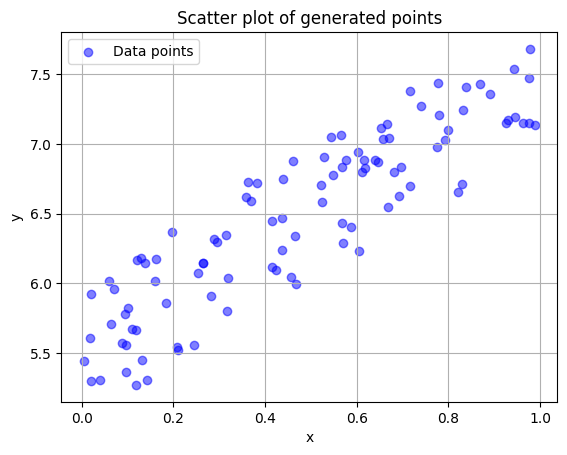

In [39]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of generated points')
plt.legend()
plt.grid(True)
plt.show()

## 선형 회귀 이론

- $y=Wx+b$ 로 표현

<img src='./images/fig_07_06.png' width=600>

- 데이터로 부터 $y=Wx+b$에 부합하는 모델을 잘 찾으려면, 데이터와 예측 값의 차이, 즉 **잔차**를 최소로 줄여야 한다.

- 평균 제곱 오차 : $L = \frac{1}{N}\sum_{i=1}^{N}(Wx_i + b - y_i)^2$
    - 총 N개의 점이 있다는 가정하에 $(x_i, y_i)$에서 제곱 오차를 구해 모두 더한 후 N으로 나눠 평균을 구한다.
> 모델의 나쁨을 평가하는 함수를 손실 함수(loss fuction) 이라 하고, 선형 회귀는 손실 함수를 평균 제곱 오차로 사용 합니다.
- 우리의 목표는  평균 제곱 오차가 최소가 되는 W와 b를 찾는 것 입니다.
    - 경사 하강법으로 이를 구합니다.

## 선형 회귀 구현

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# 토이 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 생략 가능

# 매개변수 정의
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

# 예측 함수
def predict(x):
    y = F.matmul(x, W) + b  # 행렬의 곱으로 여러 데이터 일괄 계산
    return y

<img src='./images/fig_07_07.png' width=600>

- 대응하는 차원의 원소 수가 일치 함 
- 만약 차원 수가 D 인 경우에도 W의 형상을 (D, 1)로 바꿔 주기만 하면 됨

<img src='./images/fig_07_08.png' width=600>

- x.shape[1] 과 W.shape[0]의 원소 수를 일치 시키면 행렬 곱이 올바르게 계산 됨

In [95]:
# 평균 제곱 오차(식 7.2) 계산 함수
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

# 경사 하강법으로 매개변수 갱신
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    # 또는 loss = F.mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:  # 10회 반복마다 출력
        print(loss.data)

print('====')
print('W =', W.data)
print('b =', b.data)

0.07641981995033889
0.07637566938172886
0.07634196652522371
0.07631623905279551
0.07629659968372769
0.07628160774005896
0.07627016346330089
0.07626142733985958
0.07625475851714623
0.07624966779278995
====
W = [[1.94874755]]
b = [5.55189916]


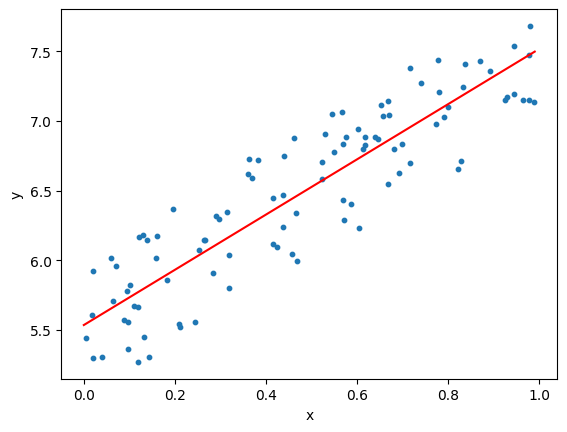

In [94]:
# [그림 7-9] 학습 후 모델
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# 신경망

## 비선형 데이터셋

In [48]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

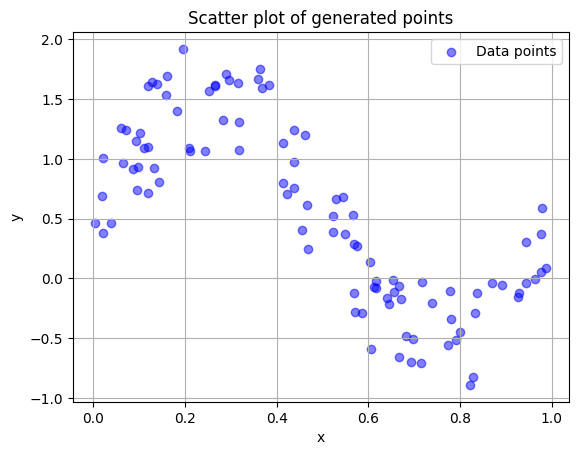

In [49]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of generated points')
plt.legend()
plt.grid(True)
plt.show()

## 선형 변환과 활성화 함수

- 어파인 변환
    ```python
    y = F.matmul(x, W)+b
    ```
    - x와 W 사이의 행렬 곱구한 다음 b 를 더하는 계산
    - DeZero의 어파인 변환    
    ```python
    y = F.linear(x, W, b)
    ```

- 비선형 변환을 수행하는 활성화 함수(activation function)
    - 결과가 '직선'이 아닌 함수
    - 시그모이드, relu 등

<img src='./images/fig_07_11.png' width=600>

## 신경망 구현
- 일반적인 신경망은 '선형 변환'과 '활성화 함수'를 번갈아 가며 사용

In [98]:
import numpy as np
from dezero import Variable
import dezero.functions as F

# 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

# 매개변수 초기화
I, H, O = 1, 10, 1 # I = 입력층 차원 수, H = 은닉층 차원 수, O = 출력층 차원 수
W1 = Variable(0.01*np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01*np.random.randn(H, O))
b2 = Variable(np.zeros(O))

# 신경망 추론
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 100000

# 신경망 학습(매개변수 갱신)
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    
    
    if i%10000 == 0:
        print(loss.data)    

0.8473695850105871
0.0769866103269294
0.07589293654035062
0.07671666381288059
0.07957826573034187
0.07908595627762348
0.07855107126702682
0.07784198679456532
0.07703042695795326
0.07626091535135818


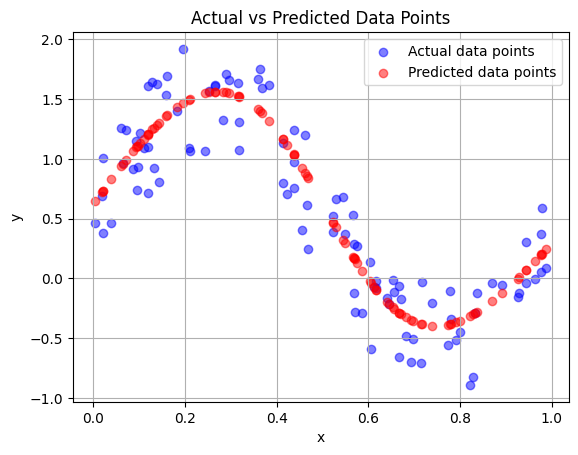

In [99]:
plt.scatter(x, y, color='blue', alpha=0.5, label='Actual data points')
plt.scatter(x, predict(x).data, color='red', alpha=0.5, label='Predicted data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted Data Points')
plt.legend()
plt.grid(True)
plt.show()

## 계층과 모델
- 계층 클레스는 매개변수 관리, 초기화 기능 제공
```python
Linear(out_size, nobias=False, dtype=np.float32, in_size=None)
```
- in_size가 None 이면, 입력 데이터 크기는 데이터를 실제 흘려 보낼때 결정

In [100]:
import numpy as np
import dezero.layers as L

linear = L.Linear(10) # 출력 크기만 지정

batch_size, input_size = 100, 5
x = np.random.randn(batch_size, input_size)
y = linear(x) # 입력 데이터 x에 대해 선형 변환 수행, 가중치와 편향 자체 내장

print(f'y shape : {y.shape}')
print(f'params shape : {linear.W.shape}, {linear.b.shape}')

for param in linear.params(): # 매게변수에 접근
    print(param.name, param.shape)

y shape : (100, 10)
params shape : (5, 10), (10,)
b (10,)
W (5, 10)


In [101]:
from dezero import Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x): # 실제 처리 실행 하는 함수, 순전파
        y = F.relu(self.l1(x))
        y = self.l2(y)
        return y

In [61]:
model = TwoLayerNet(10, 1)

# 모든 매게변수에 접근
for param in model.params():
    print(param)
    
# 모든 매게변수의 기울기 초기화    
model.cleargrads()    

variable([0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
variable(None)


In [102]:
import numpy as np
from dezero import Model
import dezero.layers as L
import dezero.functions as F

# 데이터 셋 학습
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model): # 2층 신경망
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)        
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

In [103]:
model = TwoLayerNet(10, 1) # 모델 구성 

for i in range(iters):
    y_pred = model.forward(x) # 또는 y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrads()
    loss.backward()
    
    for p in model.params():
        p.data -= lr*p.grad.data
    
    if i%1000 == 0:
        print(loss) 

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355147)
variable(0.07655073683421636)
variable(0.07637803086238222)
variable(0.0761876413118557)


## 옵티마이저(최적화 기법)
- 모델의 매개변수를 갱신

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers  # 옵티마이저들이 들어 있는 패키지 임포트
import dezero.layers as L
import dezero.functions as F

# 데이터셋 생성
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TwoLayerNet(10, 1)
optimizer = optimizers.SGD(lr)  # 옵티마이저 생성
optimizer.setup(model)          # 최적화할 모델을 옵티마이저에 등록

for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()  # 옵티마이저로 매개변수 갱신
    if i % 1000 == 0:
        print(loss.data)

0.8165178492839196
0.24990280802148895
0.24609876581126014
0.2372159081431807
0.20793216413350174
0.12311905720649353
0.07888166506355147
0.07655073683421636
0.07637803086238222
0.0761876413118557


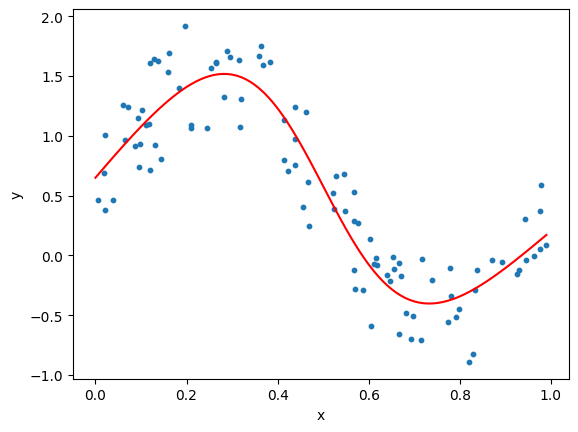

In [105]:
# 그래프로 시각화([그림 7-12]와 같음)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = model(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# Q러닝과 신경망
- Q러닝과 신경망의 결합

## 신경망의 전처리
- state를 one hot으로
- 배치 처리(일괄 처리)에 대응

In [3]:
import numpy as np

def one_hot(state):
    # 벡터 준비
    HEIGHT, WIDTH = 3, 4
    vec = np.zeros(HEIGHT*WIDTH, dtype=np.float32)

    # state에 해당하는 원소만 1.0 으로 설정
    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0

    # 배치 처리를 위해 새로운 축 추가
    return vec[np.newaxis, :]

state = (2, 0)
x = one_hot(state)

print(x.shape)
print(x)

(1, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


## Q 함수를 표현하는 신경망

In [4]:
from collections import defaultdict

Q = defaultdict(lambda : 0)
state = (2, 0)
action = 0

print(Q[state, action])

0


<img src='./images/fig_07_13.png' width=600>

- Q함수는 (state, action) 쌍의 데이터를 입력 받아 Q함수 출력하는 두가지 방법
    - 방법 1 : 상태와 행동을 입력 받아 Q함수 하나만 출력
    - 방법 2 : 상태만 입력 받아, 가능한 행동의 개수 만큼 Q 함수 값 출력
- 방법 1은 최대값을 구하는 계산 비용이 추가로 발생, 방법 2 사용
> $max_a Q(s, a)$ 를 계산 하려면, 행동 후보의 수 만큼 신경망을 순전파 하여 Q값을 구해야 하여 계산 비용이 크다

In [5]:
from dezero import Model
import dezero.functions as F
import dezero.layers as L

class QNet(Model):
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(100)  # 중간층의 크기
        self.l2 = L.Linear(4)    # 행동의 크기(가능한 행동의 개수)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

In [6]:
qnet = QNet()    
state = (2, 0)
state = one_hot(state) # 원-핫 벡터로 변환

qs = qnet(state)
qs.shape

(1, 4)

In [7]:
qs

variable([[-0.19092761 -0.01058601  0.03802602 -0.01077551]])

## 신경망과 Q러닝

- Q 러닝에 대해 가볍게 복습해봅시다. 6장에서 배운 것처럼 Q 러닝에서는 다음 식을 통해 Q 함수를 갱신합니다.

$ Q'(S_t, A_t) = Q(S_t, A_t) + \alpha \left\{ R_t + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t) \right\} \tag{식 7.3} $

- 이 식에 의해 $ Q(S_t, A_t) $의 값은 목표인 $ R_t + \gamma \max_a Q(S_{t+1}, a) $ 방향으로 갱신됩니다.
- 이때 $ \alpha $는 목표 방향으로 얼마나 나아갈 것인지를 조정합니다.
- 여기서 목표인 $ R_t + \gamma \max_a Q(S_{t+1}, a) $를 $ T $로 간소화해보죠.

$ Q'(S_t, A_t) = Q(S_t, A_t) + \alpha \left\{ T - Q(S_t, A_t) \right\} \tag{식 7.4} $

- 위 식은 입력이 $ S_t, A_t $일 때 출력이 $ T $가 되도록 Q 함수를 갱신하는 것으로 해석할 수 있습니다.
- 신경망 맥락에 대입하여 표현하자면, 입력이 $ S_t, A_t $일 때 출력이 $ T $가 되도록 학습시킨다는 뜻입니다.
- 즉, $ T $를 정답 레이블로 볼 수 있습니다. 또한 $ T $는 스칼라값이기 때문에 회귀 문제로 생각할 수 있습니다.

In [8]:
from dezero import optimizers

class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.lr = 0.01
        self.epsilon = 0.1
        self.action_size = 4

        self.qnet = QNet()                        # 신경망 초기화
        self.optimizer = optimizers.SGD(self.lr)  # 옵티마이저 생성
        self.optimizer.setup(self.qnet)           # 옵티마이저에 신경망 등록

    def get_action(self, state_vec):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            qs = self.qnet(state_vec)
            return qs.data.argmax()

    def update(self, state, action, reward, next_state, done):
        # 다음 상태에서 최대가 되는 Q 함수의 값(next_q) 계산
        if done:  # 목표 상태에 도달
            next_q = np.zeros(1)  # [0.]  # [0.] (목표 상태에서의 Q 함수는 항상 0)
        else:     # 그 외 상태
            next_qs = self.qnet(next_state)
            next_q = next_qs.max(axis=1)
            next_q.unchain()  # next_q를 역전파 대상에서 제외

        # 목표
        target = self.gamma * next_q + reward
        # 현재 상태에서의 Q 함수 값(q) 계산
        qs = self.qnet(state)
        q = qs[:, action]
        # 목표(target)와 q의 오차 계산
        loss = F.mean_squared_error(target, q)

        # 역전파 → 매개변수 갱신
        self.qnet.cleargrads()
        loss.backward()
        self.optimizer.update()

        return loss.data

> next_q는 정답 레이블을 만들기 위해 사용. 지도학습에서 정답 레이블의 기울기는 필요 없기에, next_q.unchain()으로 역전파에서 제외

- if 문을 사용하지 않는 update 구현 방법
```python
def update(self, state, action, reward, next_state, done):
    done = int(done)
    next_qs = self.qnet(next_state)
    next_q = next_qs.max(axis=1)
    next_q.unchain()
    target = reward + (1 - done) * self.gamma*next_q
```

In [9]:
from common.gridworld import GridWorld

env = GridWorld()
agent = QLearningAgent()

episodes = 1000  # 에피소드 수
loss_history = []

for episode in range(episodes):
    state = env.reset()
    state = one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    average_loss = total_loss / cnt
    loss_history.append(average_loss)

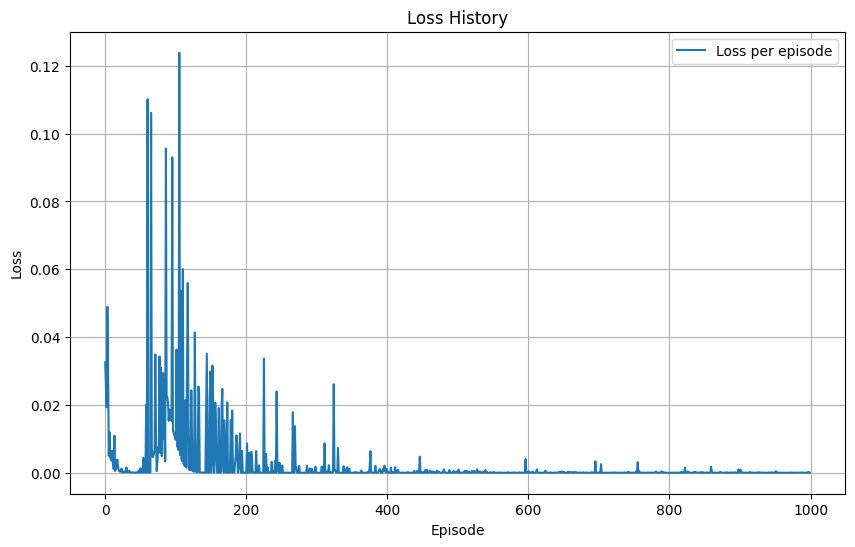

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss per episode')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.grid(True)
plt.show()

- 신경망을 이용한 강화학습에서는 학습 시 손실이 안정되게 나오지 않는 경우가 많다.
- 그럼에도 큰 틀에서 보면 에피소드를 거듭할 수록 손실이 작아지고 있다.

/tmp/ipykernel_3022/1738239546.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[state, action] = float(q.data)


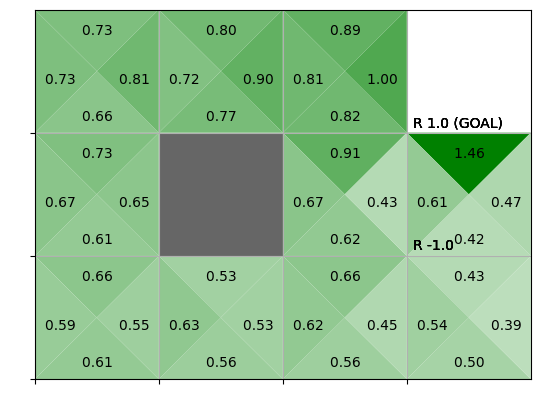

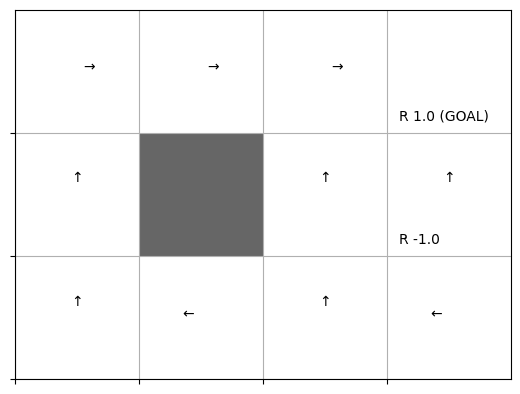

In [87]:
# [그림 7-15] 신경망을 이용한 Q 러닝으로 얻은 Q 함수와 정책
Q = {}
for state in env.states():
    for action in env.action_space:
        q = agent.qnet(one_hot(state))[:, action]
        Q[state, action] = float(q.data)
env.render_q(Q)

# 정리

1. **DeZero 프레임워크 사용법 학습**
   - DeZero는 파이토치와 같은 최신 딥러닝 프레임워크와 유사한 개념으로 설계된 프레임워크.
   - 데이터의 ndarray처럼 다룰 수 있으며 역전파를 통해 미분을 구할 수 있음.
   - 미분을 이용해 매개변수를 갱신하는 경사 하강법 등을 쉽게 구현 가능.

2. **기초적인 머신러닝 문제 해결**
   - DeZero를 사용하여 선형 회귀 문제를 풀어봄.
   - 비선형 데이터셋을 처리하는 신경망을 구현하고 올바르게 학습 가능 확인.

3. **DeZero의 다양한 클래스**
   - 계층, 모델, 옵티마이저 등 신경망 구현에 도움이 되는 클래스들이 다양하게 제공됨.
   - 이를 이용하면 신경망을 쉽게 구현할 수 있음.

4. **신경망을 이용한 Q 러닝 구현**
   - Q 러닝의 기본 원리를 이해한 후 신경망을 적용하여 Q 러닝을 구현.
   - Q 러닝의 원리를 이해했다면 신경망 적용이 어렵지 않음.

5. **강화 학습과 딥러닝의 결합**
   - 심층 강화 학습의 세계로 들어섬.
   - 상태나 행동의 크기가 커져도 걱정할 필요 없음.